# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

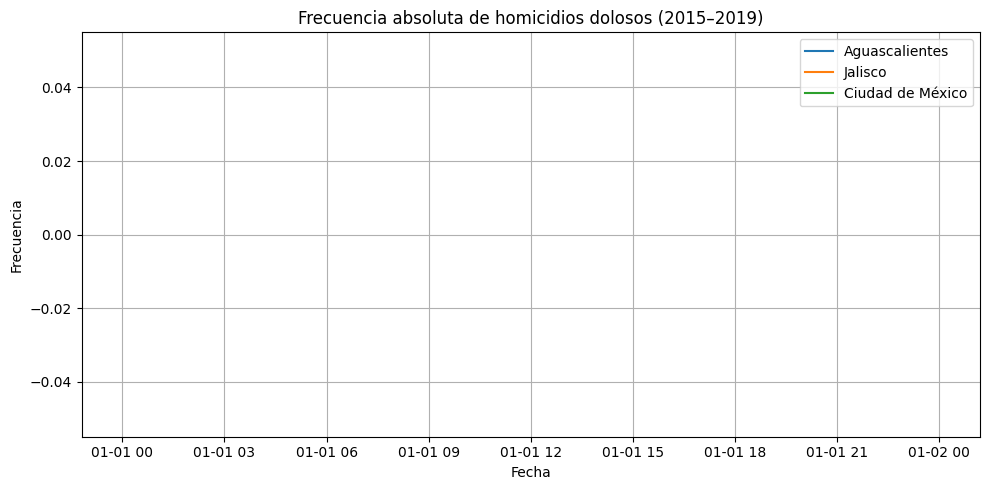

In [6]:
df["fecha"] = pd.to_datetime(df["fecha"])

# Filtrar homicidio doloso
df_hd = df[df["tipo_de_delito"] == "Homicidio doloso"]

# Elegir tres estados
estados = ["Aguascalientes", "Jalisco", "Ciudad de México"]
df_hd = df_hd[df_hd["entidad"].isin(estados)]

# Filtrar periodo: enero 2015 a julio 2019
df_hd = df_hd[
    (df_hd["fecha"] >= "2015-01-01") &
    (df_hd["fecha"] <= "2019-07-01")
]

# Agrupar por entidad y fecha (frecuencia absoluta)
serie_tiempo = (
    df_hd
    .groupby(["entidad", "fecha"])["frecuencia"]
    .sum()
    .reset_index()
)

# Graficar
plt.figure(figsize=(10, 5))

for estado in estados:
    datos = serie_tiempo[serie_tiempo["entidad"] == estado]
    plt.plot(datos["fecha"], datos["frecuencia"], label=estado)

plt.title("Frecuencia absoluta de homicidios dolosos (2015–2019)")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ejercicio 2: Contesta las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [9]:
# pandas ya se importa en otra celda, no es necesario importarlo de nuevo

df_delitos_long = pd.read_csv("data/delitos.csv")

df_colima_2018_homicidio = df_delitos_long[
    (df_delitos_long['entidad'] == 'Colima') &
    (df_delitos_long['anio'] == 2018) &
    (df_delitos_long['tipo_de_delito'] == 'Homicidio')
]

total_homicidios = df_colima_2018_homicidio['frecuencia'].sum()
print(total_homicidios)
# Resultado esperado si el archivo se encuentra: 726.0


726.0


In [ ]:
# 2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
# ----------------------------------------------------------------------
total_robos_2019 = df_delitos_long[
    (df_delitos_long['anio'] == 2019) &
    (df_delitos_long['tipo_de_delito'] == 'Robo de vehículo automotor')
]['frecuencia'].sum()

print(f"Total robos de vehículo automotor en 2019: {total_robos_2019}")


# ----------------------------------------------------------------------
# 3. Suma de homicidios dolosos y feminicidios en toda la República Mexicana en cada año.
# ----------------------------------------------------------------------
delitos_violencia = ['Homicidio doloso', 'Feminicidio']
suma_violencia_por_año = (
    df_delitos_long[df_delitos_long['tipo_de_delito'].isin(delitos_violencia)]
    .groupby('anio')['frecuencia']
    .sum()
    .reset_index()
    .rename(columns={'anio': 'Año', 'frecuencia': 'Total'})
)

print("\nSuma de Homicidio Doloso y Feminicidio por Año (Nacional):")
print(suma_violencia_por_año)


# ----------------------------------------------------------------------
# 4. ¿En qué mes y en qué estado ha ocurrido el mayor número de feminicidios?
# ----------------------------------------------------------------------
df_fem = df_delitos_long[df_delitos_long['tipo_de_delito'] == 'Feminicidio'].copy()

if not df_fem.empty:
    max_row = df_fem.loc[df_fem['frecuencia'].idxmax()]
    print("\nMes y Entidad con el mayor número de Feminicidios en un solo mes:")
    print(f"Año: {int(max_row['anio'])}, Mes: {max_row['nombre_mes']}, Entidad: {max_row['entidad']}, Frecuencia: {max_row['frecuencia']}")
else:
    print("\nNo hay registros de Feminicidio en los datos.")


# ----------------------------------------------------------------------
# 5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?
# ----------------------------------------------------------------------
if not df_fem.empty:
    agrupado = df_fem.groupby(['anio', 'entidad'])['frecuencia'].sum().reset_index()
    max_agr = agrupado.loc[agrupado['frecuencia'].idxmax()]
    print("\nAño y Entidad con el mayor número de Feminicidios (total anual):")
    print(f"Año: {int(max_agr['anio'])}, Entidad: {max_agr['entidad']}, Total anual: {max_agr['frecuencia']}")
else:
    print("\nNo hay registros de Feminicidio en los datos.")

Total robos de vehículo automotor en 2019: 0.0

Suma de Homicidio Doloso y Feminicidio por Año (Nacional):
    Año  Total
0  2015  413.0
1  2016  608.0
2  2017  744.0
3  2018  899.0
4  2019  944.0
5  2020  947.0
6  2021  981.0
7  2022  961.0
8  2023  832.0
9  2024  401.0

Mes y Entidad con el mayor número de Feminicidios en un solo mes:
Año: 2020, Mes: julio, Entidad: México, Frecuencia: 19.0

Año y Entidad con el mayor número de Feminicidios (total anual):
Año: 2020, Entidad: México, Total anual: 151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar el archivo
df_delitos = pd.read_csv("datos_delitos.csv")

# 2. Definir columnas de meses
columnas_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# 3. Calcular 'Total Anual' para todas las filas, rellenando NaNs con 0
df_delitos[columnas_meses] = df_delitos[columnas_meses].fillna(0)
df_delitos['Total Anual'] = df_delitos[columnas_meses].sum(axis=1)

# 4. Agrupar por Año y Tipo de delito y sumar el 'Total Anual'
df_annual_crime_totals = df_delitos.groupby(['Año', 'Tipo de delito'])['Total Anual'].sum().reset_index()

# 5. Obtener años únicos
years = sorted(df_annual_crime_totals['Año'].unique())
num_years = len(years)

# 6. Configurar la figura y las subgráficas (5 filas, 2 columnas para 10 años)
nrows = 5
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 30))
axes = axes.flatten() # Aplanar el array 2D de ejes para una fácil iteración

# 7. Iterar a través de los años y crear las gráficas de pastel
for i, year in enumerate(years):
    ax = axes[i]
    
    # a. Filtrar datos para el año actual
    df_year = df_annual_crime_totals[df_annual_crime_totals['Año'] == year].sort_values(by='Total Anual', ascending=False)
    
    # b. Agregación para legibilidad: Mantener el top N (ej. 5) y agrupar el resto en 'Otros'
    top_n = 5
    
    # Verificar si hay más categorías que el top_n
    if len(df_year) > top_n:
        top_categories = df_year.head(top_n)
        other_total = df_year.iloc[top_n:]['Total Anual'].sum()
        
        # Preparar los datos finales para la gráfica
        plot_values = top_categories['Total Anual'].tolist()
        plot_labels = top_categories['Tipo de delito'].tolist()
        
        if other_total > 0:
            plot_values.append(other_total)
            plot_labels.append('Otros')
    else:
        plot_values = df_year['Total Anual'].tolist()
        plot_labels = df_year['Tipo de delito'].tolist()

    # c. Trazar la gráfica de pastel
    ax.pie(
        plot_values, 
        labels=plot_labels, 
        autopct='%1.1f%%', 
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
        textprops={'fontsize': 10}
    )
    
    # d. Establecer el título
    ax.set_title(f'Distribución de Tipos de Delito - {year}', fontsize=14)
    ax.axis('equal') # Asegura que la gráfica se dibuje como un círculo.

# Ocultar cualquier subgráfica no utilizada
for j in range(num_years, nrows * ncols):
    fig.delaxes(axes[j])

# 8. Ajustar el diseño y guardar la figura
plt.suptitle('Distribución Anual de Tipos de Delito (Top 5 + Otros)', fontsize=18, y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.90]) # Ajustar el diseño para hacer espacio para el título principal
plt.savefig('grafica_pastel_tipos_delito_anual.png')
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'datos_delitos.csv'

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [ ]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()